# Verifying that lateral GABA inhibtion affects firing rate in a population

In [1]:
%matplotlib inline

import os
import numpy as np
network_path = os.path.join("..", "networks", "sten_3")
network_file = os.path.join(network_path, "network-synapses.hdf5")
simulation_file_with_synapses = os.path.join(network_path, "simulation", "output-with-synapses-sten_3-B.hdf5")
simulation_file_no_synapses = os.path.join(network_path, "simulation", "output-no-synapses-sten_3-B.hdf5")
duration = 18

# Plot network

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/sten_3/network-config.json
Population unit 0 has 31997 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 0 has 31997 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


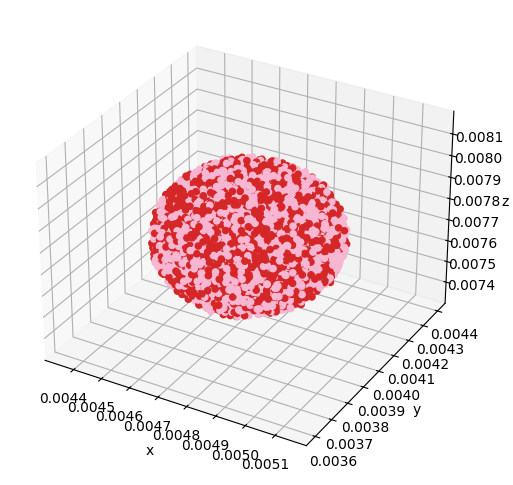

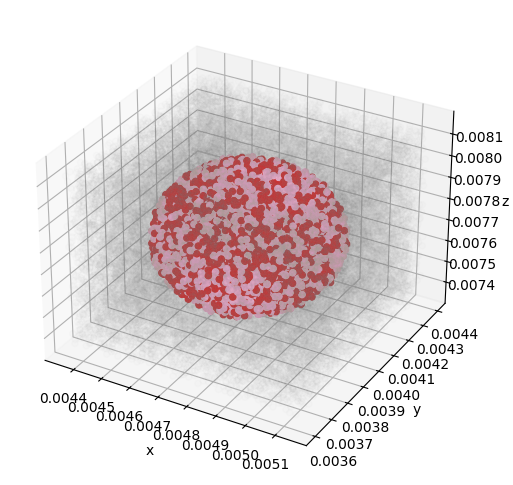

In [2]:
from snudda.plotting import PlotNetwork

pn = PlotNetwork(network_path)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/sten_3/network-config.json
Population unit 0 has 31997 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 0 has 31997 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


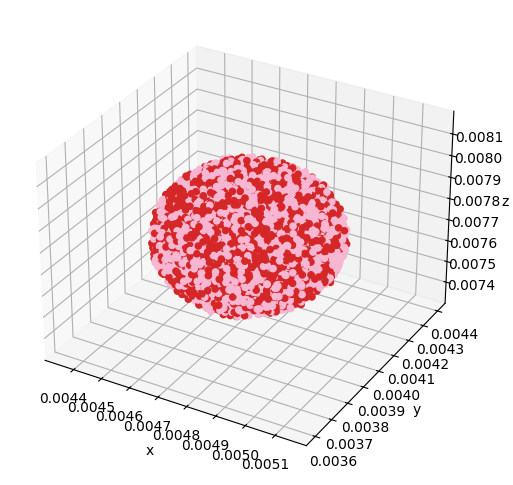

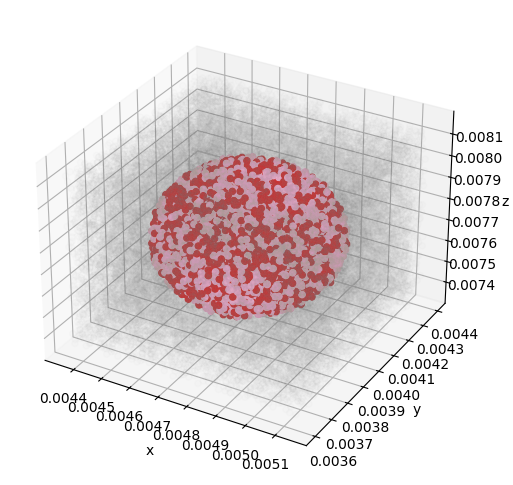

In [3]:
from snudda.plotting import PlotNetwork

pn2 = PlotNetwork(network_file)
pn2.plot_populations(unmarked_alpha=0)
pn2.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn2.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

# Plot neuron input

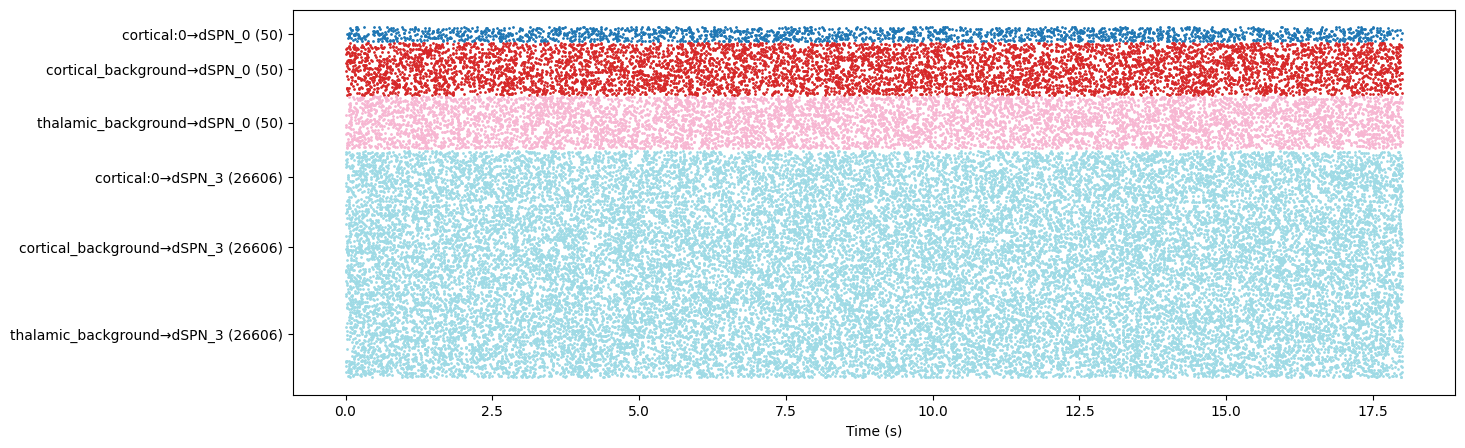

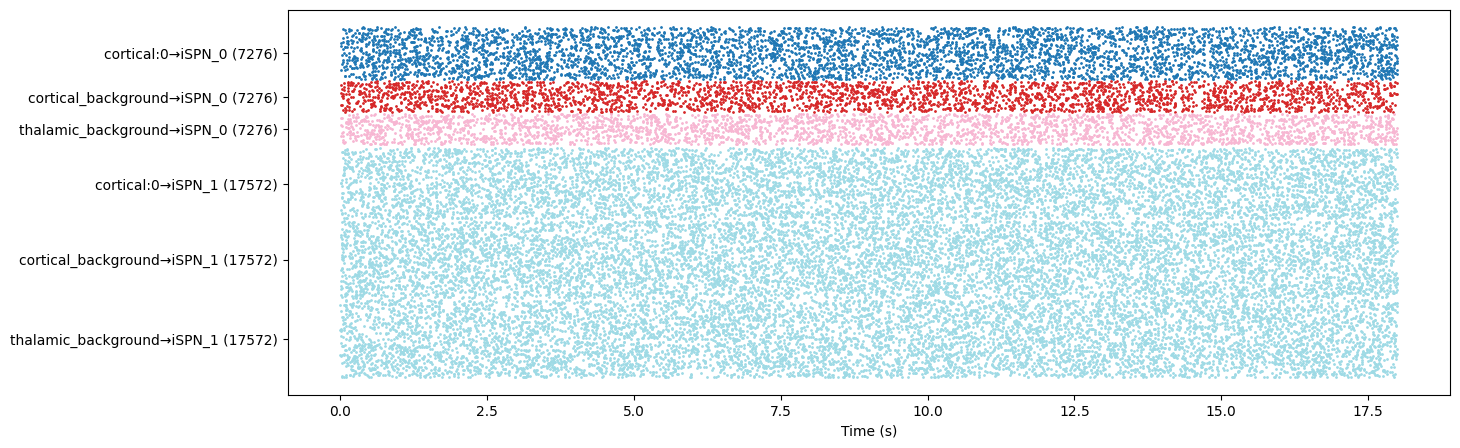

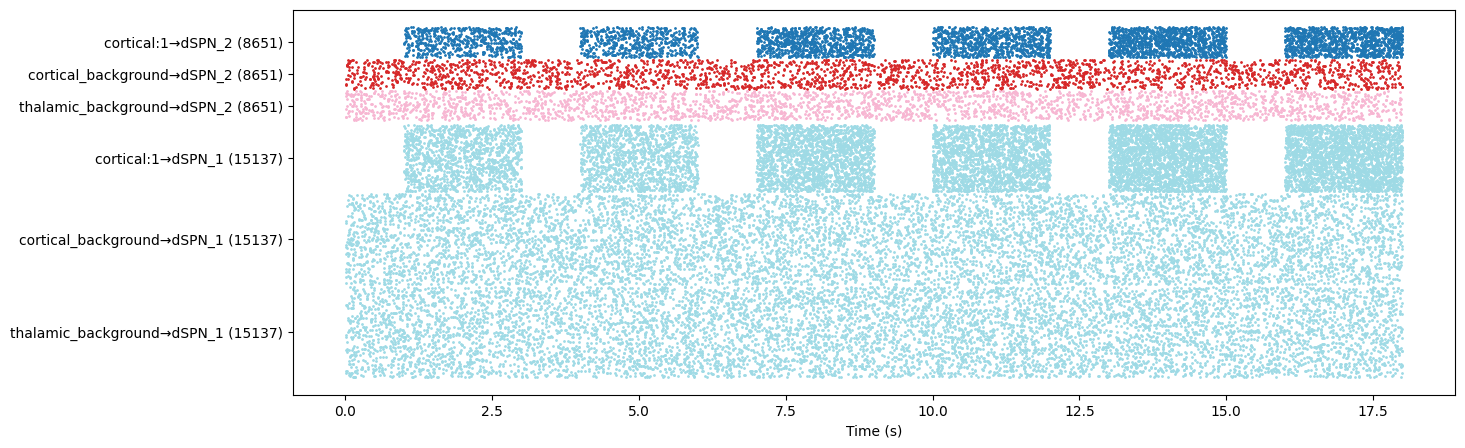

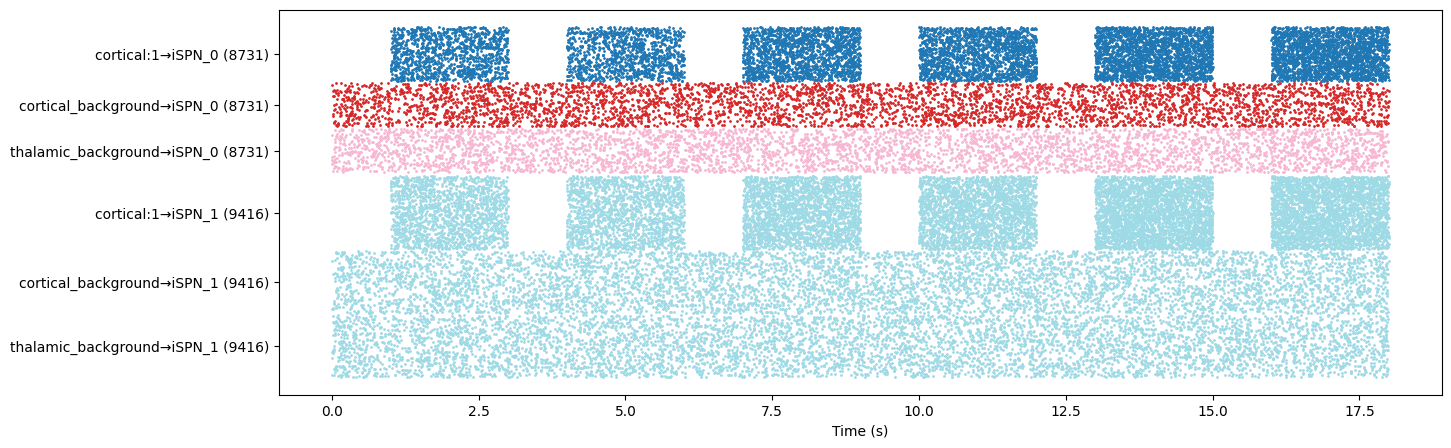

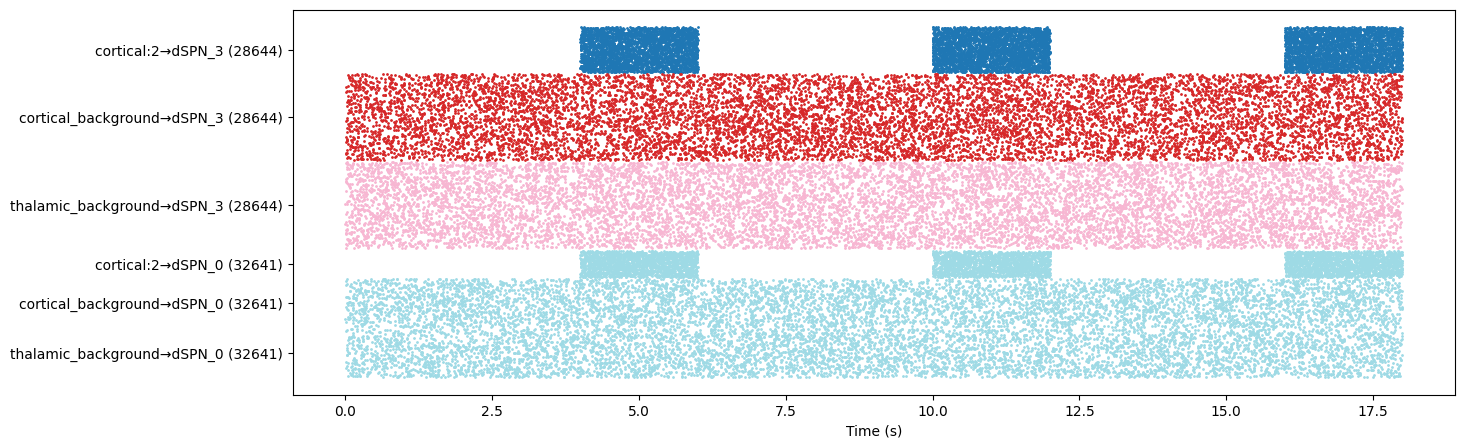

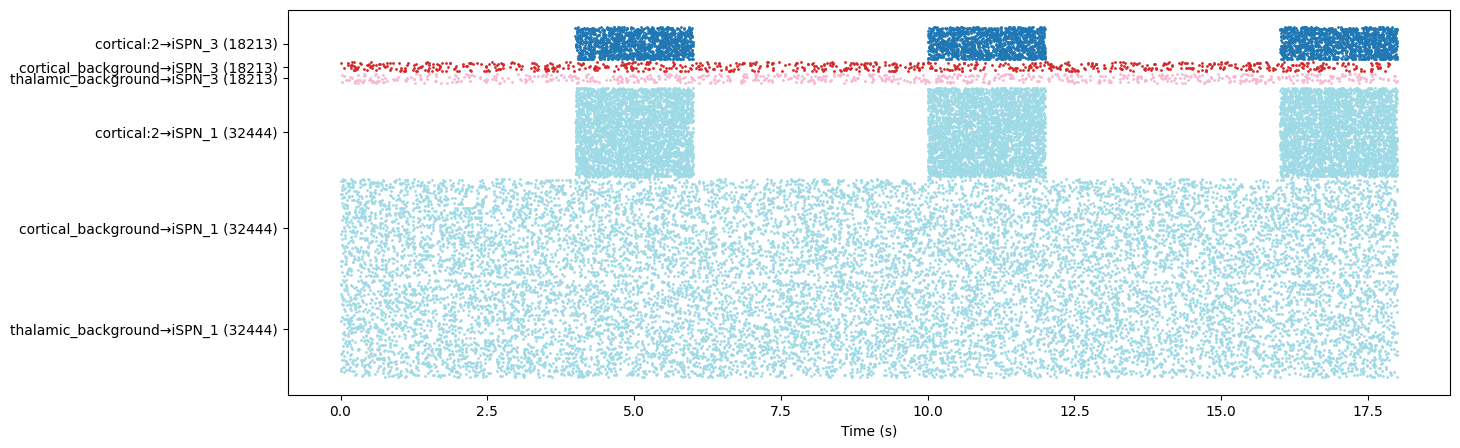

In [4]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes-B.hdf5")

spi = PlotInput(input_file, network_file)

spi.plot_input_population_unit(population_unit_id=0, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=0, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

In [5]:
# Cleanup
pn = None
spi = None

# Plot neuron activity

## With lateral inhibtion

In [6]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_with_synapses)# 

# spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_3/simulation/output-with-synapses-sten_3-B.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
37: (dSPN_0, pb0529fb9, m22be6817)
53: (dSPN_0, p8bf90d1f, m37886c78)
485: (dSPN_0, pe6ec2d4b, m37886c78)
790: (LTS_1, p3900bef0, mda52699c)
791: (FS_0, p4feff98b, m86da4874)
792: (FS_1, p31916918, mf0a83676)
1571: (LTS_0, p1fd33c8c, m803558b5)
1581: (dSPN_0, p8bf90d1f, mc710c1a4)
2485: (LTS_1, p72cfe937, m872fbb26)
2487: (FS_0, p59a48310, m15ae4048)
3551: (LTS_1, pe2b0b6c2, ma4dacccf)
3561: (dSPN_0, pb0529fb9, m9fda9b20)
3581: (dSPN_0, pb0529fb9, m22be6817)
3592: (dSPN_0, pb0529fb9, mc710c1a4)
3944: (LTS_1, pb5a5193d, mda52699c)
3956: (dSPN_0, pb0529fb9, mf702205f)
3960: (dSPN_0, p8bf90d1f, mbb8e5b24)
3964: (dSPN_0, p8bf90d1f, mc710c1a4)
3975: (dSPN_0, p8bf90d1f, m9fda9b20)
4396: (LTS_1, pe5eef847, mda52699c)
4397: (LTS_1, p733ec61e, mda52699c)
4418: (dSPN_0, pb0529fb9, m22be6817)
4770: (LTS_0, pe9c8b984, m803558b5)
4772: 

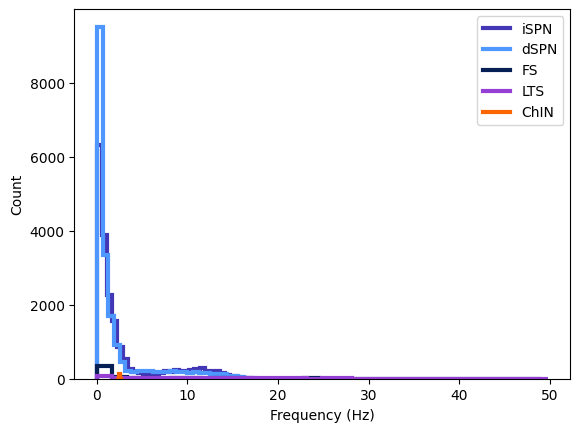

In [7]:
spr.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/sten_3/figures/spike-frequency-pop-units0-1-2.pdf


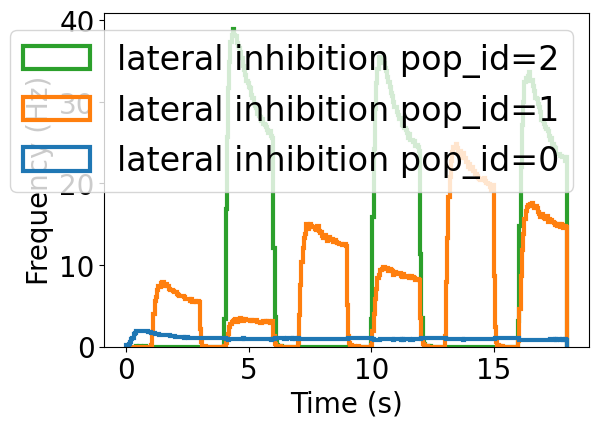

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [8]:
spr.plot_spike_histogram(label_text="lateral inhibition pop_id=")

## Without lateral inhibition

In [9]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr_no = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_no_synapses)

# spr_no.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_3/simulation/output-no-synapses-sten_3-B.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
790: (LTS_1, p3900bef0, mda52699c)
1571: (LTS_0, p1fd33c8c, m803558b5)
1622: (dSPN_0, p1863c9a5, m37886c78)
2049: (dSPN_0, p1863c9a5, m22be6817)
2485: (LTS_1, p72cfe937, m872fbb26)
2487: (FS_0, p59a48310, m15ae4048)
2503: (dSPN_0, p7aa400d6, m22be6817)
3551: (LTS_1, pe2b0b6c2, ma4dacccf)
3944: (LTS_1, pb5a5193d, mda52699c)
3956: (dSPN_0, pb0529fb9, mf702205f)
4353: (iSPN_3, p57956f10, m541041a7)
4396: (LTS_1, pe5eef847, mda52699c)
4397: (LTS_1, p733ec61e, mda52699c)
4770: (LTS_0, pe9c8b984, m803558b5)
4772: (LTS_1, p272f9557, mda52699c)
4773: (LTS_1, p607c0a42, mf4ba6a4e)
4774: (LTS_1, pd2ca4eaf, m803558b5)
4817: (dSPN_0, pb0529fb9, m9fda9b20)
5187: (LTS_0, pe9c8b984, m803558b5)
5188: (LTS_0, p1fd33c8c, m803558b5)
5189: (LTS_1, p08df4357, m872fbb26)
5190: (LTS_1, pe2b0b6c2, ma4dacccf)
5560: (LTS_1, p733ec61e, mda52699c)
5561:

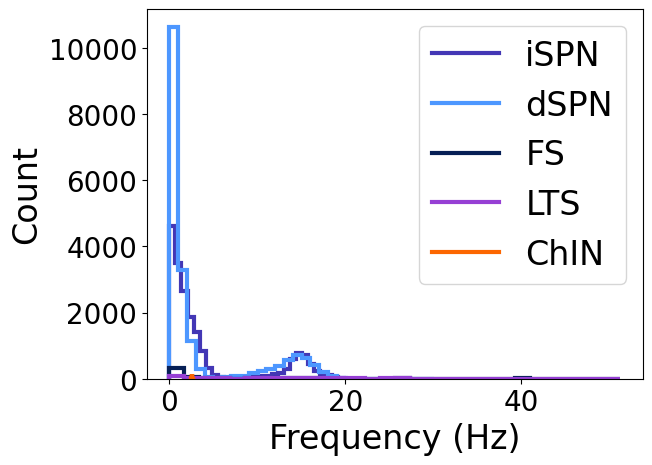

In [10]:
spr_no.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/sten_3/figures/spike-frequency-pop-units0-1-2.pdf


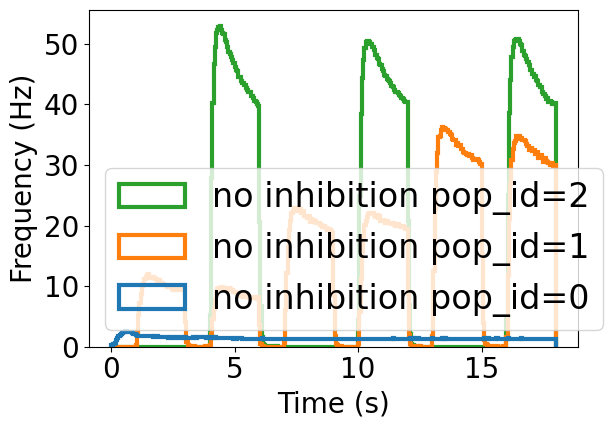

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [11]:
spr_no.plot_spike_histogram(label_text="no inhibition pop_id=")

# Summarising difference in activity (with and without lateral inhibition)

Saving figure ../networks/sten_3/figures/spike-frequency-pop-units0-1-2.pdf


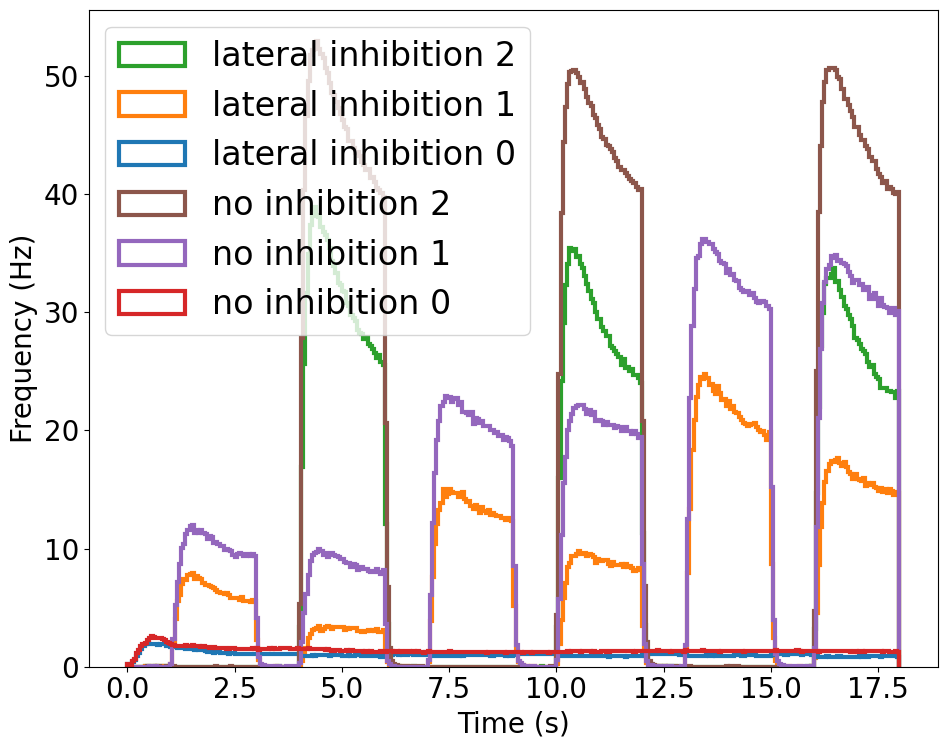

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [12]:
ax = spr.plot_spike_histogram(label_text="lateral inhibition ", show_figure=False, save_figure=False, fig_size=(10,8))
spr_no.plot_spike_histogram(ax=ax, label_text="no inhibition ", show_figure=True, save_figure=True)

In [13]:
time_ranges = [(2,3), (5,6), (8,9), (11,12), (14,15), (17,18)]

pop_id0 = spr.snudda_load.get_population_unit_members(population_unit=0)
pop_id1 = spr.snudda_load.get_population_unit_members(population_unit=1)
pop_id2 = spr.snudda_load.get_population_unit_members(population_unit=2)

with_lat_freq_table0 = spr.snudda_simulation_load.get_frequency(neuron_id=pop_id0, time_ranges=time_ranges)
with_lat_freq_table1 = spr.snudda_simulation_load.get_frequency(neuron_id=pop_id1, time_ranges=time_ranges)
with_lat_freq_table2 = spr.snudda_simulation_load.get_frequency(neuron_id=pop_id2, time_ranges=time_ranges)

no_lat_freq_table0 = spr_no.snudda_simulation_load.get_frequency(neuron_id=pop_id0, time_ranges=time_ranges)
no_lat_freq_table1 = spr_no.snudda_simulation_load.get_frequency(neuron_id=pop_id1, time_ranges=time_ranges)
no_lat_freq_table2 = spr_no.snudda_simulation_load.get_frequency(neuron_id=pop_id2, time_ranges=time_ranges)

In [14]:
with_lat_freq0_mean = np.mean(with_lat_freq_table0, axis=0)
with_lat_freq1_mean = np.mean(with_lat_freq_table1, axis=0)
with_lat_freq2_mean = np.mean(with_lat_freq_table2, axis=0)

no_lat_freq0_mean = np.mean(no_lat_freq_table0, axis=0)
no_lat_freq1_mean = np.mean(no_lat_freq_table1, axis=0)
no_lat_freq2_mean = np.mean(no_lat_freq_table2, axis=0)

n0_cells = with_lat_freq_table0.shape[0]
n1_cells = with_lat_freq_table1.shape[0]
n2_cells = with_lat_freq_table2.shape[0]

# Standard error of the mean
with_lat_freq0_std = np.std(with_lat_freq_table0, axis=0) / np.sqrt(n0_cells)
with_lat_freq1_std = np.std(with_lat_freq_table1, axis=0) / np.sqrt(n1_cells)
with_lat_freq2_std = np.std(with_lat_freq_table2, axis=0) / np.sqrt(n2_cells)

no_lat_freq0_std = np.std(no_lat_freq_table0, axis=0) / np.sqrt(n0_cells)
no_lat_freq1_std = np.std(no_lat_freq_table1, axis=0) / np.sqrt(n1_cells)
no_lat_freq2_std = np.std(no_lat_freq_table2, axis=0) / np.sqrt(n2_cells)

In [15]:
print("With lateral inhibition")
for freq1_mean, freq1_std, freq2_mean, freq2_std, freq0_mean, freq0_std in zip(with_lat_freq1_mean, with_lat_freq1_std, with_lat_freq2_mean,with_lat_freq2_std,with_lat_freq0_mean,with_lat_freq0_std):
    print(f"Freq 1: {freq1_mean:.2f} +/- {freq1_std:.2f}\tFreq 2: {freq2_mean:.2f} +/- {freq2_std:.2f}\tFreq 0: {freq0_mean:.2f} +/- {freq0_std:.2f}")

With lateral inhibition
Freq 1: 5.92 +/- 0.07	Freq 2: 0.00 +/- 0.00	Freq 0: 1.13 +/- 0.01
Freq 1: 3.10 +/- 0.05	Freq 2: 28.28 +/- 0.17	Freq 0: 0.92 +/- 0.01
Freq 1: 12.96 +/- 0.11	Freq 2: 0.01 +/- 0.00	Freq 0: 0.96 +/- 0.01
Freq 1: 8.59 +/- 0.11	Freq 2: 26.33 +/- 0.19	Freq 0: 0.90 +/- 0.01
Freq 1: 20.67 +/- 0.15	Freq 2: 0.00 +/- 0.00	Freq 0: 0.94 +/- 0.01
Freq 1: 15.19 +/- 0.16	Freq 2: 24.78 +/- 0.19	Freq 0: 0.89 +/- 0.01


In [16]:
print("No lateral inhibition")
for freq1_mean, freq1_std, freq2_mean, freq2_std, freq0_mean, freq0_std in zip(no_lat_freq1_mean, no_lat_freq1_std, no_lat_freq2_mean,no_lat_freq2_std, no_lat_freq0_mean,no_lat_freq0_std):
    print(f"Freq 1: {freq1_mean:.2f} +/- {freq1_std:.2f}\tFreq 2: {freq2_mean:.2f} +/- {freq2_std:.2f}\tFreq 0: {freq0_mean:.2f} +/- {freq0_std:.2f}")

No lateral inhibition
Freq 1: 9.78 +/- 0.09	Freq 2: 0.01 +/- 0.00	Freq 0: 1.55 +/- 0.02
Freq 1: 8.37 +/- 0.08	Freq 2: 42.72 +/- 0.11	Freq 0: 1.32 +/- 0.01
Freq 1: 20.07 +/- 0.12	Freq 2: 0.00 +/- 0.00	Freq 0: 1.24 +/- 0.01
Freq 1: 20.17 +/- 0.12	Freq 2: 42.55 +/- 0.11	Freq 0: 1.31 +/- 0.01
Freq 1: 31.69 +/- 0.12	Freq 2: 0.01 +/- 0.00	Freq 0: 1.32 +/- 0.01
Freq 1: 31.10 +/- 0.12	Freq 2: 42.28 +/- 0.12	Freq 0: 1.29 +/- 0.01


In [17]:
with_lat_n_firing1 = np.sum(with_lat_freq_table1 > 0, axis=0)
with_lat_n_firing2 = np.sum(with_lat_freq_table2 > 0, axis=0)

no_lat_n_firing1 = np.sum(no_lat_freq_table1 > 0, axis=0)
no_lat_n_firing2 = np.sum(no_lat_freq_table2 > 0, axis=0)

In [18]:
print("With lateral inhibition")
for n1_active, n2_active in zip(with_lat_n_firing1, with_lat_n_firing2):
    print(f"Neurons active 1: {n1_active}/{n1_cells}\tNeurons active 2: {n2_active}/{n2_cells}")

With lateral inhibition
Neurons active 1: 3605/4000	Neurons active 2: 9/4000
Neurons active 1: 2754/4000	Neurons active 2: 3972/4000
Neurons active 1: 3893/4000	Neurons active 2: 17/4000
Neurons active 1: 3532/4000	Neurons active 2: 3932/4000
Neurons active 1: 3929/4000	Neurons active 2: 9/4000
Neurons active 1: 3774/4000	Neurons active 2: 3890/4000


In [19]:
print("No lateral inhibition")
for n1_active, n2_active in zip(no_lat_n_firing1, no_lat_n_firing2):
    print(f"Neurons active 1: {n1_active}/{n1_cells}\tNeurons active 2: {n2_active}/{n2_cells}")

No lateral inhibition
Neurons active 1: 3766/4000	Neurons active 2: 24/4000
Neurons active 1: 3710/4000	Neurons active 2: 3983/4000
Neurons active 1: 3924/4000	Neurons active 2: 13/4000
Neurons active 1: 3917/4000	Neurons active 2: 3981/4000
Neurons active 1: 3956/4000	Neurons active 2: 17/4000
Neurons active 1: 3955/4000	Neurons active 2: 3976/4000


In [20]:
# Cleanup
spr = None
spr_no = None

# Plotting the traces for the two cases to make sure it looks ok

In [21]:
from snudda.plotting.plot_traces import PlotTraces
pt_with_syn = PlotTraces(output_file=simulation_file_with_synapses, network_file=network_file)
# Use trace_id to specify which traces


Loading network info from ../networks/sten_3/network-synapses.hdf5
Loading input info from ../networks/sten_3/input-spikes.hdf5
Loading ../networks/sten_3/simulation/output-with-synapses-sten_3-B.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
37: (dSPN_0, pb0529fb9, m22be6817)
53: (dSPN_0, p8bf90d1f, m37886c78)
485: (dSPN_0, pe6ec2d4b, m37886c78)
790: (LTS_1, p3900bef0, mda52699c)
791: (FS_0, p4feff98b, m86da4874)
792: (FS_1, p31916918, mf0a83676)
1571: (LTS_0, p1fd33c8c, m803558b5)
1581: (dSPN_0, p8bf90d1f, mc710c1a4)
2485: (LTS_1, p72cfe937, m872fbb26)
2487: (FS_0, p59a48310, m15ae4048)
3551: (LTS_1, pe2b0b6c2, ma4dacccf)
3561: (dSPN_0, pb0529fb9, m9fda9b20)
3581: (dSPN_0, pb0529fb9, m22be6817)
3592: (dSPN_0, pb0529fb9, mc710c1a4)
3944: (LTS_1, pb5a5193d, mda52699c)
3956: (dSPN_0, pb0529fb9, mf702205f)
3960: (dSPN_0, p8bf90d1f, mbb8e5b24)
3964: (dSPN_0, p8bf90d1f, mc710c1a4)
3975: (dSPN_0, p8bf90d1f, m9fda9b20)
4396: (LTS_1, pe5eef847

In [22]:
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [2025 2049 2085 2170 2182 2241 2359 2395 2495 2496 2498 2502 2507 2513
 2514 2522 2525 2537 2545 2550 2551 2563 2565 2566 2570 2571 2577 2581
 2582 2583]
Plotted 30 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_3/figures/Network-voltage-trace--iSPN-dSPN.pdf


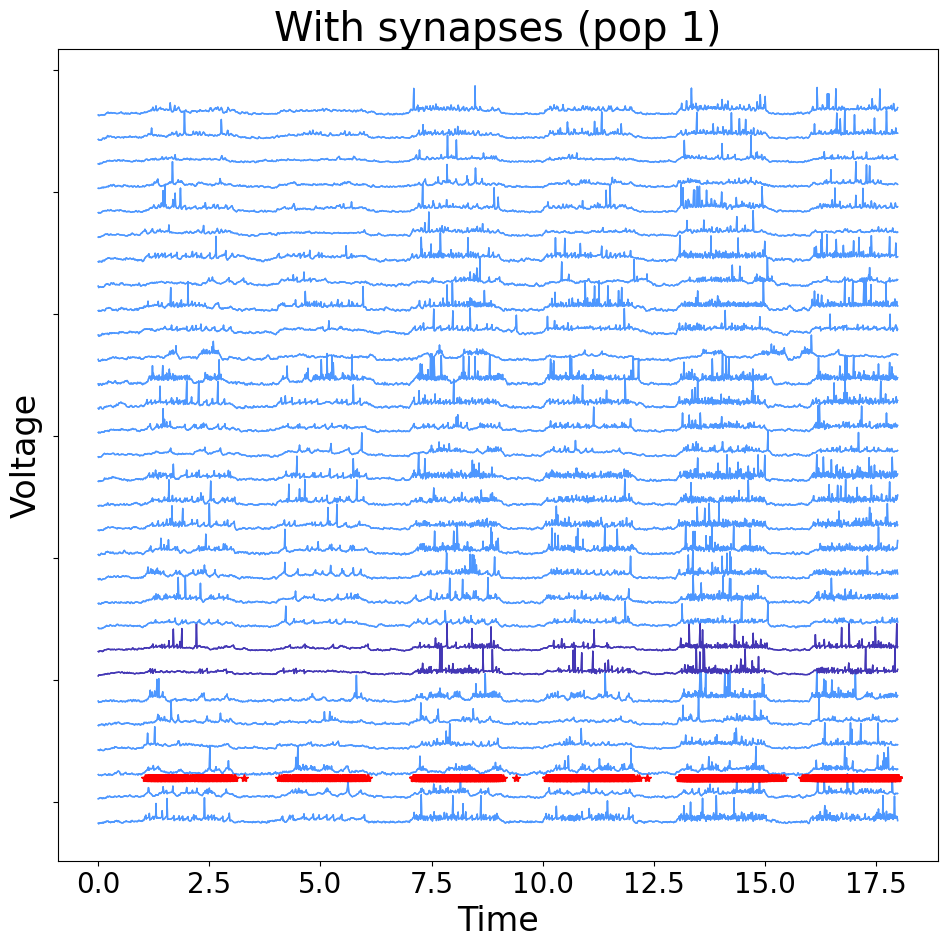

In [23]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 1)",
                            trace_id=pop_id_1)

Plotting traces: [2074 2094 2115 2128 2181 2186 2247 2263 2267 2437 2500 2503 2504 2509
 2512 2520 2521 2526 2527 2532 2544 2549 2552 2554 2555 2564 2568 2573
 2580 2585]
Plotted 30 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_3/figures/Network-voltage-trace--iSPN-dSPN.pdf


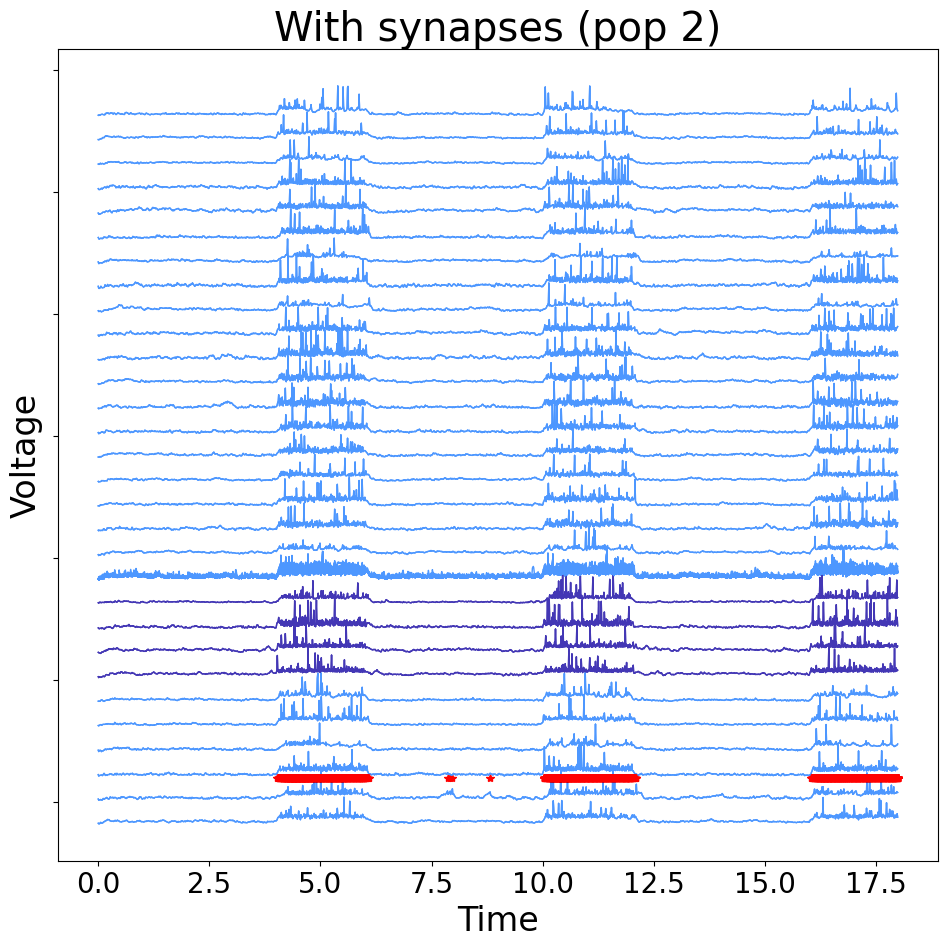

In [24]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 2)",
                            trace_id=pop_id_2)

In [25]:
from snudda.plotting.plot_traces import PlotTraces
pt_no_syn = PlotTraces(output_file=simulation_file_no_synapses, network_file=network_file)
# Use trace_id to specify which traces

Loading network info from ../networks/sten_3/network-synapses.hdf5
Loading input info from ../networks/sten_3/input-spikes.hdf5
Loading ../networks/sten_3/simulation/output-no-synapses-sten_3-B.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
790: (LTS_1, p3900bef0, mda52699c)
1571: (LTS_0, p1fd33c8c, m803558b5)
1622: (dSPN_0, p1863c9a5, m37886c78)
2049: (dSPN_0, p1863c9a5, m22be6817)
2485: (LTS_1, p72cfe937, m872fbb26)
2487: (FS_0, p59a48310, m15ae4048)
2503: (dSPN_0, p7aa400d6, m22be6817)
3551: (LTS_1, pe2b0b6c2, ma4dacccf)
3944: (LTS_1, pb5a5193d, mda52699c)
3956: (dSPN_0, pb0529fb9, mf702205f)
4353: (iSPN_3, p57956f10, m541041a7)
4396: (LTS_1, pe5eef847, mda52699c)
4397: (LTS_1, p733ec61e, mda52699c)
4770: (LTS_0, pe9c8b984, m803558b5)
4772: (LTS_1, p272f9557, mda52699c)
4773: (LTS_1, p607c0a42, mf4ba6a4e)
4774: (LTS_1, pd2ca4eaf, m803558b5)
4817: (dSPN_0, pb0529fb9, m9fda9b20)
5187: (LTS_0, pe9c8b984, m803558b5)
5188: (LTS_0, p1fd33c

In [26]:
pop_id_1 = pt_no_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_no_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [2025 2049 2085 2170 2182 2241 2359 2395 2495 2496 2498 2502 2507 2513
 2514 2522 2525 2537 2545 2550 2551 2563 2565 2566 2570 2571 2577 2581
 2582 2583]
Plotted 30 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_3/figures/Network-voltage-trace--iSPN-dSPN.pdf


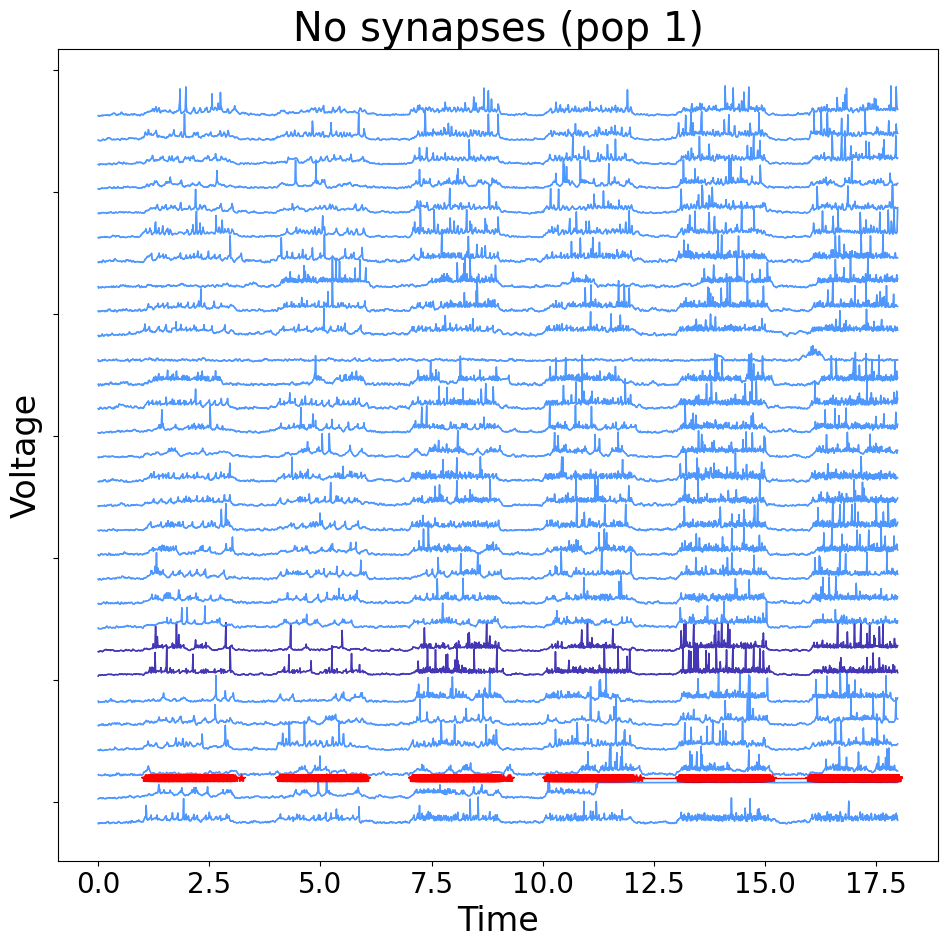

In [27]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 1)",
                           trace_id=pop_id_1)

Plotting traces: [2074 2094 2115 2128 2181 2186 2247 2263 2267 2437 2500 2503 2504 2509
 2512 2520 2521 2526 2527 2532 2544 2549 2552 2554 2555 2564 2568 2573
 2580 2585]
Plotted 30 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_3/figures/Network-voltage-trace--iSPN-dSPN.pdf


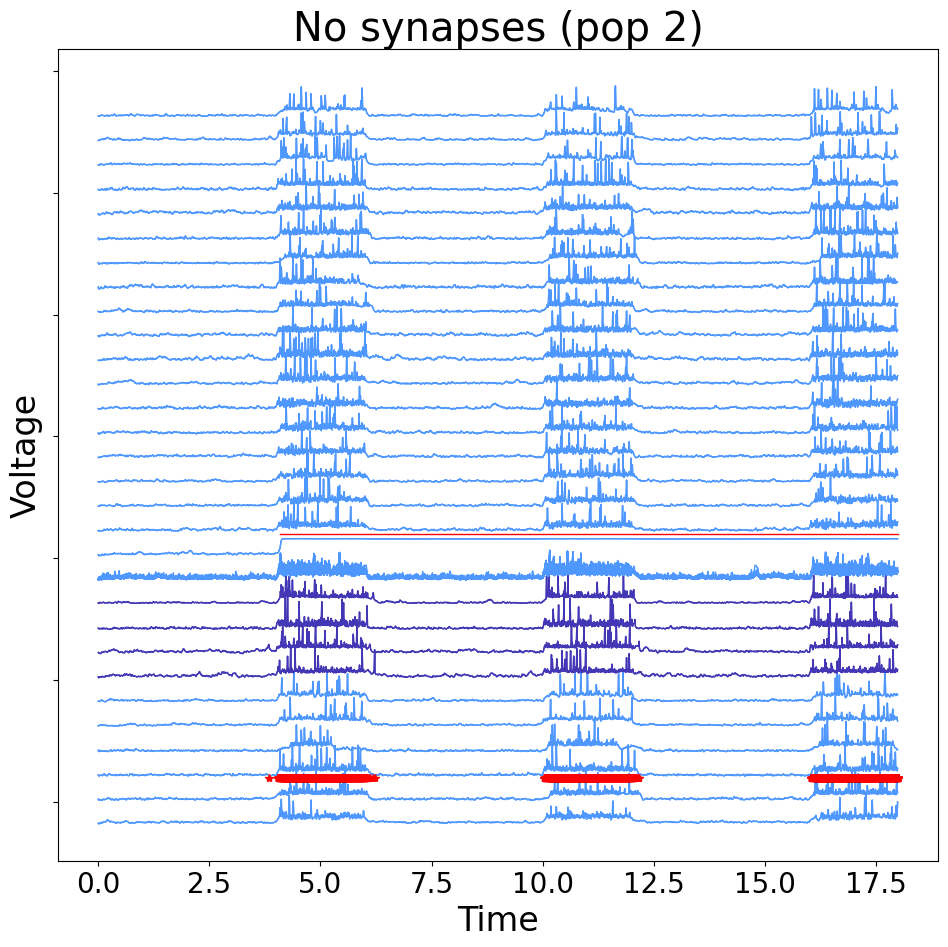

In [28]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 2)",
                           trace_id=pop_id_2)

# Plot neuron with depolarisation block

In [29]:
bad_idx_with_syn = np.unique([x[0] for x in pt_with_syn.output_load.depolarisation_block])
bad_idx_no_syn = np.unique([x[0] for x in pt_no_syn.output_load.depolarisation_block])

# Should be same network (with syn and without syn)
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2)

bad_idx_with_syn_1 = np.intersect1d(bad_idx_with_syn, pop_id_1)
bad_idx_with_syn_2 = np.intersect1d(bad_idx_with_syn, pop_id_2)

bad_idx_no_syn_1 = np.intersect1d(bad_idx_no_syn, pop_id_1)
bad_idx_no_syn_2 = np.intersect1d(bad_idx_no_syn, pop_id_2)

Plotting traces: [ 5217  6376  6757  7052  8063  8546  8548  8549  8555  8556  9201  9207
  9223  9229 10612 11041 11793 11795 11805 11818 11824 12495 12941 14224
 16075 16921 17765 18227 19462 19742 19779 19780 20518 23949 23971 23974
 23998 24995 25346 25666 28513 28516 29398]
Plotted 43 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_3/figures/Network-voltage-trace--dSPN-traces.pdf


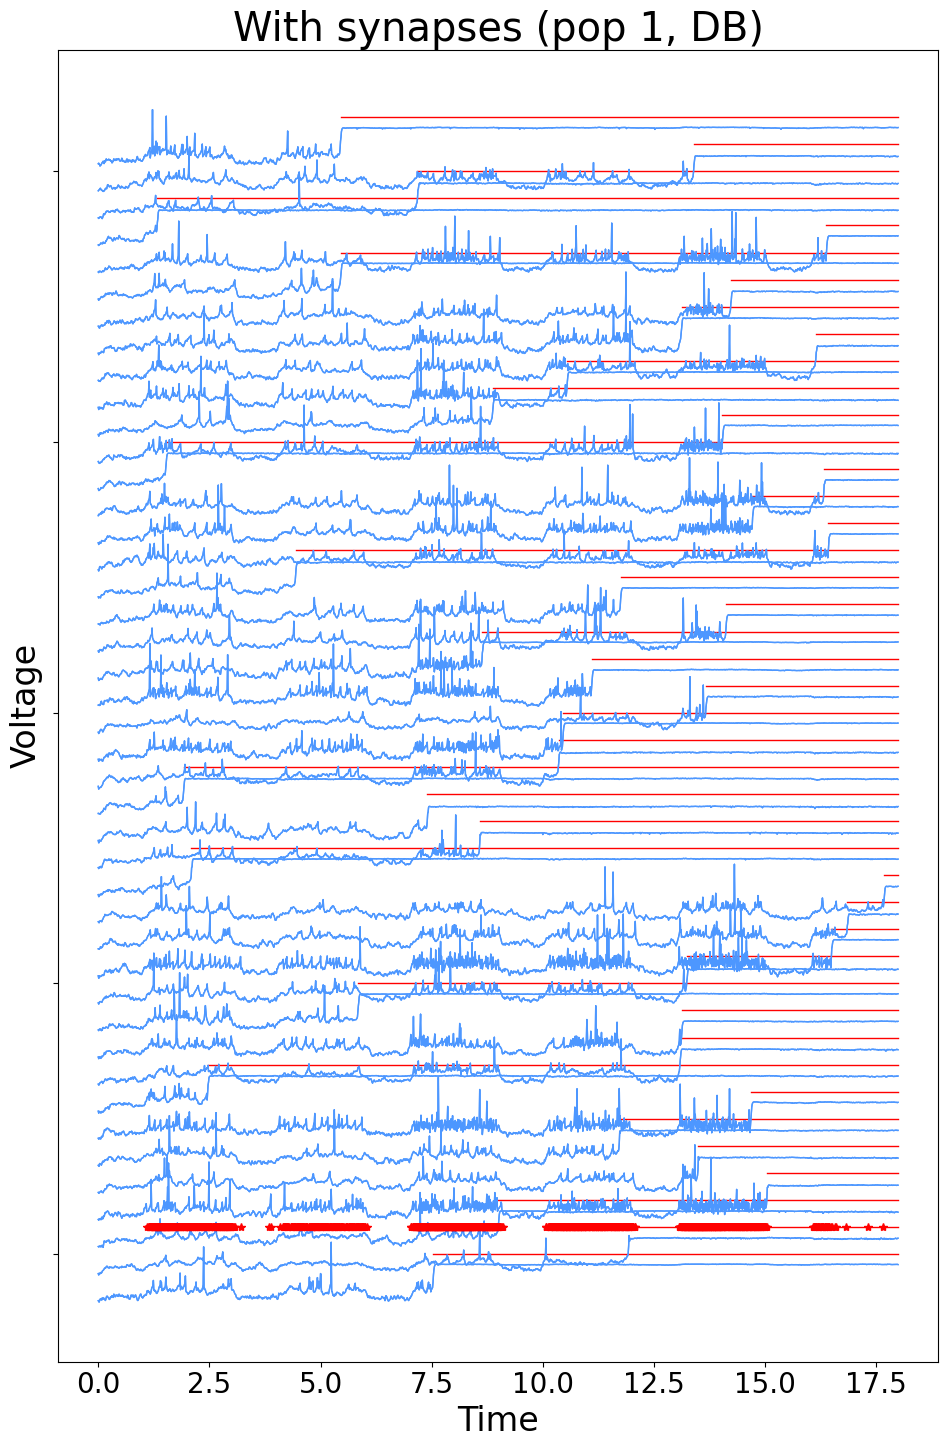

In [30]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 1, DB)",
                            trace_id=bad_idx_with_syn_1)

Plotting traces: [ 3561  3581  3592  3956  3960  3964  3975  4418  5206  5213  5984  6343
  6371  6372  6736  6738  8565  9178  9195  9226 11445 11448 11466 11472
 11780 11781 12131 12503 12504 12523 12528 13908 14177 14207 14212 15060
 15072 15076 15085 15090 16948 17761 19453 19468 19471 19749 19770 19774
 19790 22226 22230 25320 25322 25342 25440 25695 27871 28470 28500 28502]
Plotted 60 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_3/figures/Network-voltage-trace--dSPN-traces.pdf


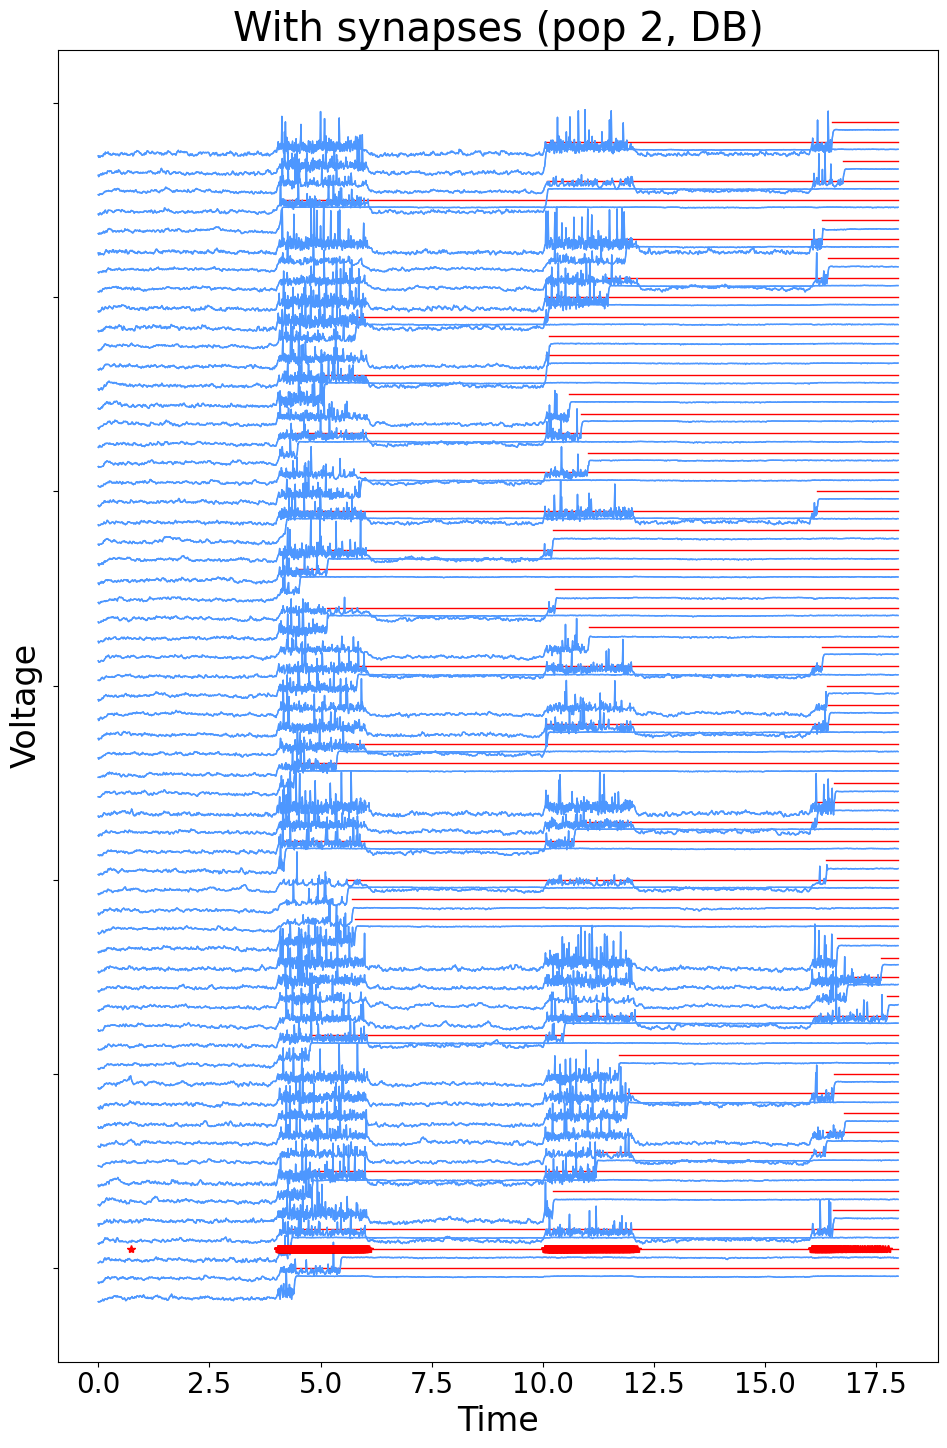

In [31]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 2, DB)",
                            trace_id=bad_idx_with_syn_2)

Plotting traces: [ 2049  6348  6354  6376  6388  6758  8075  8081  8557 12511 16922 16924
 18227 19746 19747 22220 22227 22299 23993 23999 24439 25344 31196]
Plotted 23 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_3/figures/Network-voltage-trace--iSPN-dSPN.pdf


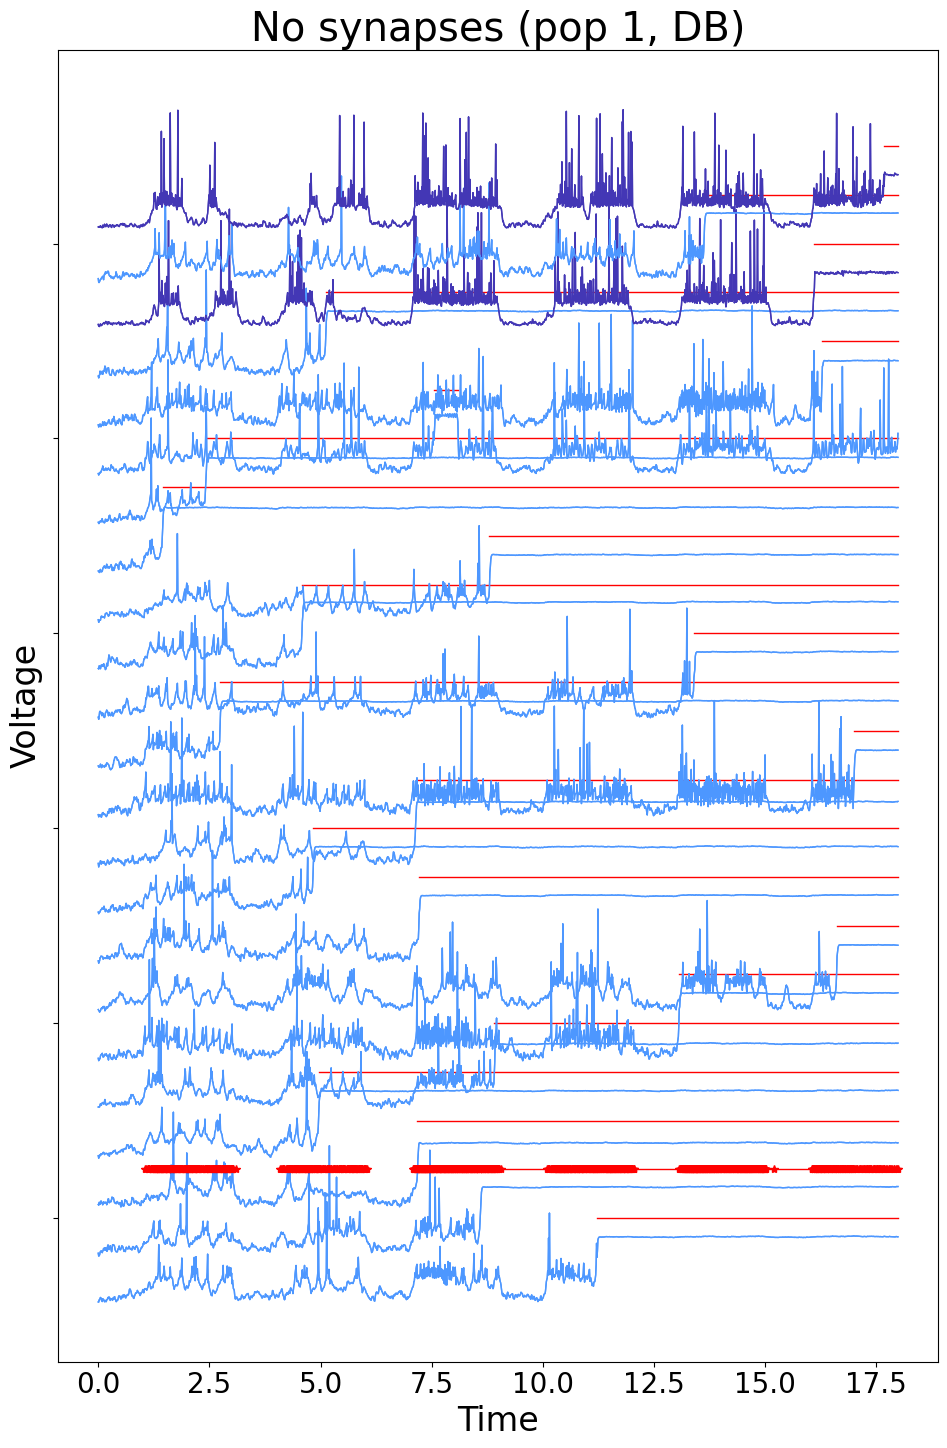

In [32]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 1, DB)",
                           trace_id=bad_idx_no_syn_1)

Plotting traces: [ 2503  3956  4353  6523  8547  8565  9198  9269  9532 11734 11911 12050
 12075 12933 13260 14194 15191 20121 24455 25328 28625 34567]
Plotted 22 traces (total 39997)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_3/figures/Network-voltage-trace--iSPN-dSPN.pdf


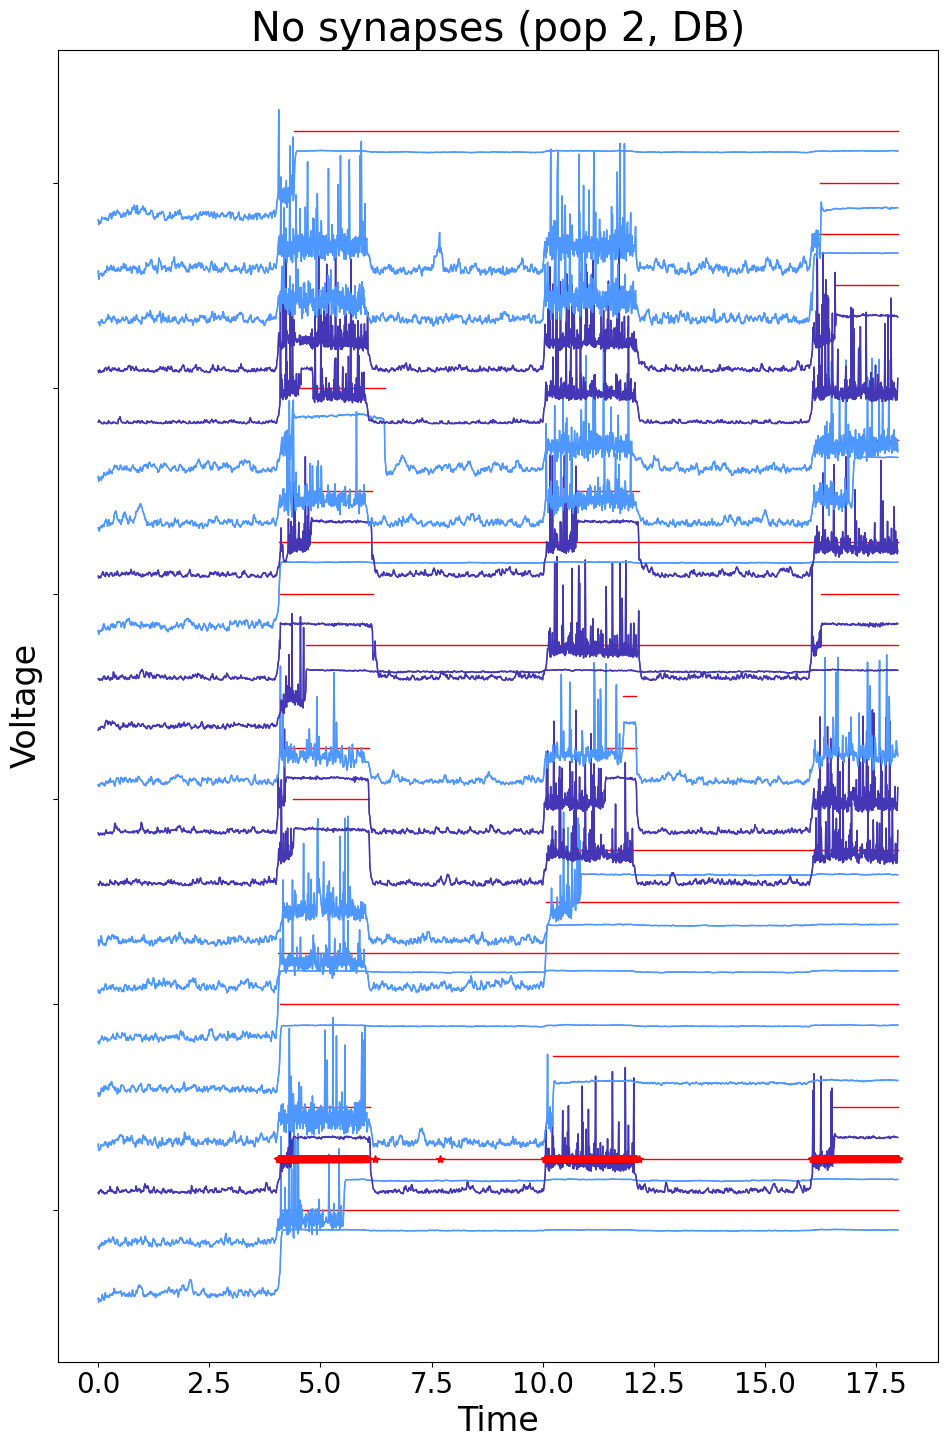

In [33]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 2, DB)",
                           trace_id=bad_idx_no_syn_2)